In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Loading the dataset
flight_data = pd.read_csv('goibibo_flights_data.csv')
flight_data.head()

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops,Unnamed: 11,Unnamed: 12
0,26-06-2023,SpiceJet,SG-8709,economy,Delhi,18:55,Mumbai,21:05,02h 10m,"6,013",non-stop,NaN,NaN
1,26-06-2023,SpiceJet,SG-8157,economy,Delhi,06:20,Mumbai,08:40,02h 20m,"6,013",non-stop,NaN,NaN
2,26-06-2023,AirAsia,I5-764,economy,Delhi,04:25,Mumbai,06:35,02h 10m,"6,016",non-stop,NaN,NaN
3,26-06-2023,Vistara,UK-995,economy,Delhi,10:20,Mumbai,12:35,02h 15m,"6,015",non-stop,NaN,NaN
4,26-06-2023,Vistara,UK-963,economy,Delhi,08:50,Mumbai,11:10,02h 20m,"6,015",non-stop,NaN,NaN


In [2]:
# Cleaning the data: Converting columns to appropriate datatypes and handling missing values.
flight_data['price'] = flight_data['price'].replace(',', '', regex=True).astype(float)
flight_data['duration'] = flight_data['duration'].str.replace('h', ' hours ').str.replace('m', ' minutes').str.strip()

In [3]:
# Data Preparation: Splitting the duration into hours and minutes
flight_data['duration_hours'] = flight_data['duration'].str.extract('(\d+)').astype(int)
flight_data['duration_minutes'] = flight_data['duration'].str.extract('(\d+) minutes').fillna(0).astype(int)

In [4]:
# Statistical summary
description = flight_data.describe()

print("Statistical Summary:\n", description)

Statistical Summary:
                price  Unnamed: 11  Unnamed: 12  duration_hours  \
count  300261.000000          0.0          0.0   300261.000000   
mean    21174.363371          NaN          NaN       11.775642   
std     23048.497726          NaN          NaN        7.199275   
min      1116.000000          NaN          NaN        0.000000   
25%      4831.000000          NaN          NaN        6.000000   
50%      7499.000000          NaN          NaN       11.000000   
75%     43159.000000          NaN          NaN       16.000000   
max    124917.000000          NaN          NaN       49.000000   

       duration_minutes  
count     300261.000000  
mean          26.526905  
std           17.351118  
min            0.000000  
25%           10.000000  
50%           25.000000  
75%           40.000000  
max           59.000000  


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


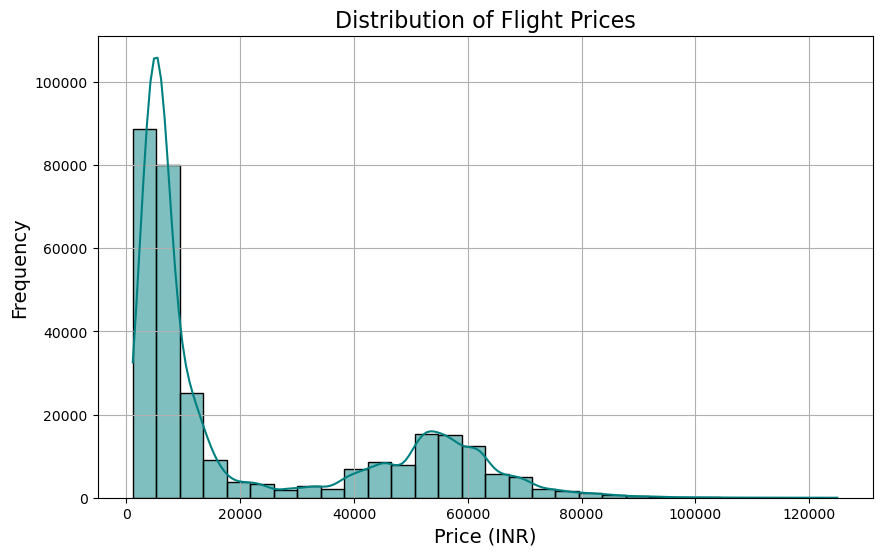

In [5]:
# Histogram of Flight Prices
def plot_price_histogram(data):
    plt.figure(figsize=(10, 6))
    sns.histplot(flight_data['price'], bins=30, kde=True, color='teal')
    plt.title('Distribution of Flight Prices', fontsize=16)
    plt.xlabel('Price (INR)', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(True)
    plt.show()

# Calling the function to create the histogram
plot_price_histogram(flight_data)

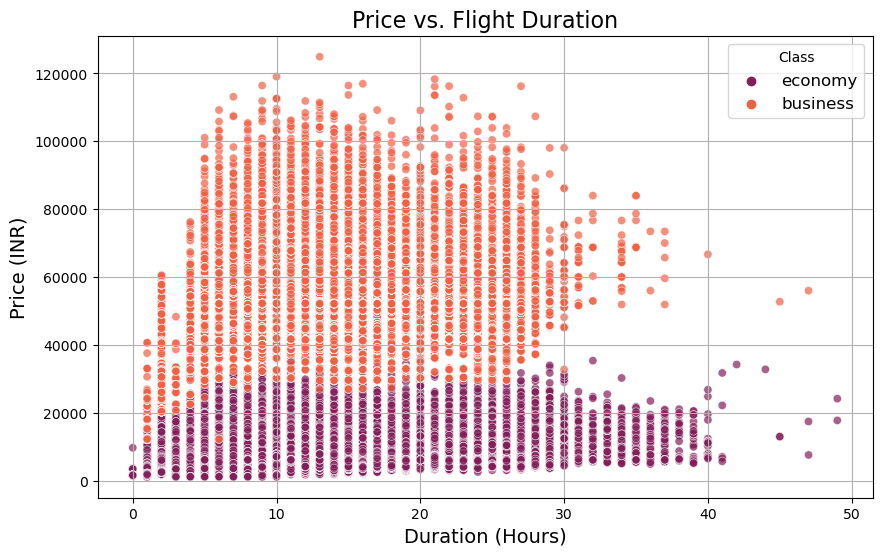

In [6]:
# Scatter Plot of Price vs. Duration
def plot_price_vs_duration(data):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='duration_hours', y='price', data=flight_data, hue='class', palette='rocket', alpha=0.7)
    plt.title('Price vs. Flight Duration', fontsize=16)
    plt.xlabel('Duration (Hours)', fontsize=14)
    plt.ylabel('Price (INR)', fontsize=14)
    plt.grid(True)
    plt.legend(title='Class', fontsize=12)
    plt.show()

# Calling the function to create the scatter plot
plot_price_vs_duration(flight_data)

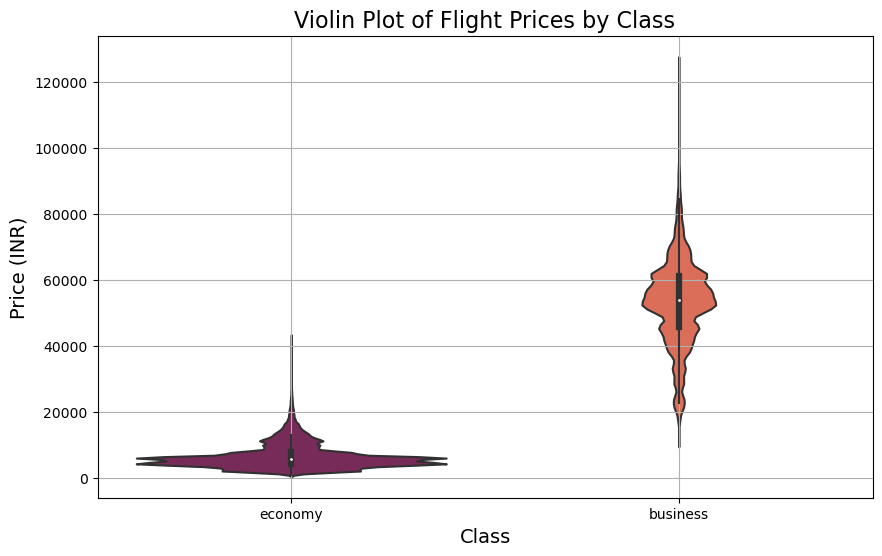

In [7]:
# Violin plot to visualize the distribution of flight prices by class
def plot_price_violin(data):
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='class', y='price', data=flight_data, palette='rocket')
    
    # Adding title and labels
    plt.title('Violin Plot of Flight Prices by Class', fontsize=16)
    plt.xlabel('Class', fontsize=14)
    plt.ylabel('Price (INR)', fontsize=14)
    plt.grid(True)
    
    plt.show()

# Call the function to create the violin plot
plot_price_violin(flight_data)